In [4]:
import torch

from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision.models as models
import PIL
from torchvision import datasets ,transforms

In [5]:
data = "archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

In [6]:
def register_extension(id, extension):
    PIL.Image.EXTENSION[extension.lower()] = id.upper()
PIL.Image.register_extension = register_extension
def register_extensions(id, extensions):
    for extension in extensions:
        register_extension(id, extension)
PIL.Image.register_extensions = register_extensions

from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [7]:
from os.path import exists

In [8]:
transform_train = transforms.Compose([transforms.RandomHorizontalFlip(),
                                     transforms.RandomResizedCrop(224),
                                     # transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

In [9]:
transform_test = transforms.Compose([transforms.RandomHorizontalFlip(),
                                     transforms.RandomResizedCrop(224),
                                     # transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

In [10]:
train_data = datasets.ImageFolder(data+"/train", transform=transform_train)
test_data = datasets.ImageFolder(data+"/valid", transform = transform_test)

In [11]:
n_classes = len(test_data.classes)
print(n_classes)
batch_size = 16

38


In [12]:
dataloader_train = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True, num_workers=2)
dataloader_test = torch.utils.data.DataLoader(test_data, batch_size, num_workers=2)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

In [17]:
def imshow_numpy(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.grid(False)
    
    image = image.transpose((1, 2, 0))
    
    mean = np.array(norm_mean)
    std = np.array(norm_std)
    image = std * image + mean
    
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

In [18]:
images, labels = next(iter(dataloader_train))

In [19]:
len(images[0].numpy()[0])

224

In [20]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')


CUDA is not available.  Training on CPU ...


In [22]:
model= models.resnet18(pretrained=True)

C:\Users\dheer\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\dheer\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\dheer/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [01:15<00:00, 619kB/s] 


In [23]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
import torch

import numpy as np
import pandas as pd
from torch import nn
import seaborn as sn
from torch import optim
from itertools import cycle
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn import svm, datasets
import torchvision.models as models
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split

In [25]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [26]:
for param in model.parameters():
    param.requires_grad = True

In [58]:
model.fc = nn.Sequential(nn.Linear(512,16),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(16,16),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(16,38),
                                 nn.LogSoftmax(dim=1))


In [59]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr = 0.00008)

model.to(device);

In [60]:
epochs=1
valid_loss_min = np.Inf

In [61]:
target = torch.randint(0, n_classes, (batch_size,))

In [62]:
def confusion_matrix(preds, labels, conf_matrix, title='Confusion matrix', cmap=plt.cm.Blues):
    preds = torch.argmax(preds, 1)
    for p, t in zip(preds, labels):
        conf_matrix[p, t] += 1

    TP = conf_matrix.diag()
    for c in range(n_classes):
        idx = torch.ones(n_classes).byte()
        idx[c] = 0
        TN = conf_matrix[idx.nonzero()[:,None], idx.nonzero()].sum()
        FP = conf_matrix[c, idx].sum()
        FN = conf_matrix[idx, c].sum()

        Recall = (TP[c] / (TP[c]+FN))
        precision = (TP[c] / (TP[c]+FP))
        f1 = (2 * ((precision * Recall)/(precision + Recall)))

    return conf_matrix

In [63]:
conf_matrix = torch.zeros(n_classes, n_classes)

first loop
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
second loop begin
second loop end
sec

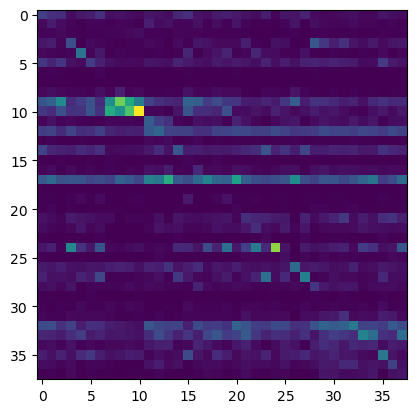

In [64]:
for epoch in range(1, epochs+1):
    print("first loop")
    train_loss = 0
    model.train()
    import warnings
    warnings.filterwarnings("ignore", category=UserWarning)
    

 
    for images, labels in dataloader_train:
        print("second loop begin")
        #steps += 1
        images, labels = images.to(device), labels.to(device)
    
        optimizer.zero_grad()
    
        output = model.forward(images)
        conf_matrix = confusion_matrix(output, labels, conf_matrix)
        p = torch.nn.functional.softmax(output, dim=1)
        prediction = torch.argmax(p, dim=1)
        #loss = torch.nn.functional.nll_loss(torch.log(p), y)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    
        train_loss += loss.item()*images.size(0)
        print("second loop end")
    
    
    
    #vis.line(X=torch.ones((1,1)).cpu()*epoch, Y=torch.Tensor([train_loss]).unsqueeze(0).cpu(),win=loss_window,update='append')    
    
  #if steps % print_every == 0:
    print("out of second loop")
    valid_loss = 0
    accuracy = 0
    model.eval()
  #print(conf_matrix)
    TP = conf_matrix.diag()
    for c in range(n_classes):
        print("third loop start")
        idx = torch.ones(n_classes).byte()
        idx[c] = 0
        TN = conf_matrix[idx.nonzero()[:,None], idx.nonzero()].sum()
        FP = conf_matrix[c, idx].sum()
        FN = conf_matrix[idx, c].sum()

        Recall = (TP[c] / (TP[c]+FN))
        precision = (TP[c] / (TP[c]+FP))
        f1 = (2 * ((precision * Recall)/(precision + Recall)))
        print("third loop end")
    print("out of third loop")
      #print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(c, TP[c], TN, FP, FN))
      #print('Sensitivity = {}'.format(sensitivity))
      #print('Specificity = {}'.format(specificity))
    #return TP[C], TN, FP, FN, sensitivity, specificity
    
  
    for images, labels in dataloader_test:
        print("in fourth loop")
        optimizer.zero_grad()
        with torch.no_grad():
            images, labels = images.to(device), labels.to(device)
      #if train_on_gpu:
      #      images, labels = data.cuda(), target.cuda()

            output = model.forward(images)
            conf_matrix = confusion_matrix(output, labels, conf_matrix)
            p = torch.nn.functional.softmax(output, dim=1)
            prediction = torch.argmax(p, dim=1)
            loss = criterion(output, labels)
          
            valid_loss += loss.item()*images.size(0)
      
            ps = torch.exp(output)
         
            top_p, top_class = ps.topk(1, dim = 1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
            print("end of fourth loop")
    print("out side of 4rth loop")
    
      
  # calculate average losses
    train_loss = train_loss/len(dataloader_train.dataset)
    valid_loss = valid_loss/len(dataloader_test.dataset)
        
  # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
  # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss
  
    print(conf_matrix)
    plt.imshow(conf_matrix)
    TP = conf_matrix.diag()
    for c in range(n_classes):
        print("inside 5th loop")
        idx = torch.ones(n_classes).byte()
        idx[c] = 0
        TN = conf_matrix[idx.nonzero()[:,None], idx.nonzero()].sum()
        FP = conf_matrix[c, idx].sum()
        FN = conf_matrix[idx, c].sum()

        Recall = (TP[c] / (TP[c]+FN))
        precision = (TP[c] / (TP[c]+FP))
        f1 = (2 * ((precision * Recall)/(precision + Recall)))
      
        print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(c, TP[c], TN, FP, FN))
        print('Recall = {}'.format(Recall))
        print('Precision = {}'.format(precision))
        print('F1 Score = {}'.format(f1))
        print("end of 5th loop")
    print("outside 5th loop")

    print("Accuracy: {:.4f}.. " .format(accuracy/len(dataloader_test)))
    model.train()

In [65]:
torch.save(model, "leaf_dense_18.pt")

In [68]:
from torchsummary import summary

In [67]:
!pip install torchsummary

In [69]:
summary(model)

TypeError: summary() missing 1 required positional argument: 'input_size'

In [70]:
from PIL import Image

In [71]:
img_random = Image.open("archive/test/test/AppleCedarRust1.JPG").convert("RGB")

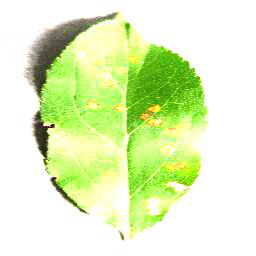

In [72]:
img_random

In [73]:
from torchvision import transforms

In [74]:
preprocess = transforms.Compose([
    transforms.Resize(265),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
])

In [75]:
img_random_preprocessed = preprocess(img_random)

In [76]:
batch_img_random_tensor = torch.unsqueeze(img_random_preprocessed, 0)

In [77]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [78]:
out = model(batch_img_random_tensor)

In [79]:
out

tensor([[-3.2815, -3.4549, -3.3391, -4.0507, -3.1662, -3.4462, -3.5438, -3.5286,
         -2.8362, -2.4623, -2.5946, -4.4928, -4.4754, -4.1071, -4.1107, -3.5234,
         -3.9658, -3.6668, -3.9022, -3.2036, -4.2797, -4.0443, -3.9321, -4.2141,
         -4.0073, -4.2612, -3.6929, -3.5894, -3.6340, -3.8018, -4.4828, -4.5245,
         -4.5280, -4.2144, -3.8618, -3.1010, -4.6833, -4.2294]],
       grad_fn=<LogSoftmaxBackward0>)

In [81]:
len(out[0])

38

In [88]:
direct = "archive/New Plant Diseases Dataset(Augmented)/disease.txt"

In [89]:
import os

In [90]:
os.listdir(direct)

NotADirectoryError: [WinError 267] The directory name is invalid: 'archive/New Plant Diseases Dataset(Augmented)/disease.txt'

In [96]:
with open(direct) as f:
    disease = f.readlines()

In [99]:
clean= []
for dis in disease:
    clean.append(dis.strip())

In [100]:
clean

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [101]:
_,index = torch.max(out, 1)

In [102]:
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100

In [107]:
print(clean[index[0]], percentage[index[0]].item())

Corn_(maize)___healthy 8.524054527282715


In [114]:
_, indices = torch.sort(out, descending=True)
[(clean[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('Corn_(maize)___healthy', 8.524054527282715),
 ('Corn_(maize)___Northern_Leaf_Blight', 7.467309474945068),
 ('Corn_(maize)___Common_rust_', 5.8647284507751465),
 ('Tomato___Target_Spot', 4.500560283660889),
 ('Blueberry___healthy', 4.216179370880127)]

In [111]:
index

tensor([9])

In [112]:
out

tensor([[-3.2815, -3.4549, -3.3391, -4.0507, -3.1662, -3.4462, -3.5438, -3.5286,
         -2.8362, -2.4623, -2.5946, -4.4928, -4.4754, -4.1071, -4.1107, -3.5234,
         -3.9658, -3.6668, -3.9022, -3.2036, -4.2797, -4.0443, -3.9321, -4.2141,
         -4.0073, -4.2612, -3.6929, -3.5894, -3.6340, -3.8018, -4.4828, -4.5245,
         -4.5280, -4.2144, -3.8618, -3.1010, -4.6833, -4.2294]],
       grad_fn=<LogSoftmaxBackward0>)

In [115]:
_, indices = torch.sort(out, descending=True)
total = [(clean[idx], percentage[idx].item()) for idx in indices[0][:5]]

In [116]:
total

[('Corn_(maize)___healthy', 8.524054527282715),
 ('Corn_(maize)___Northern_Leaf_Blight', 7.467309474945068),
 ('Corn_(maize)___Common_rust_', 5.8647284507751465),
 ('Tomato___Target_Spot', 4.500560283660889),
 ('Blueberry___healthy', 4.216179370880127)]

In [117]:
len(total)

5

In [120]:
print(total[0][0])

Corn_(maize)___healthy
